## load packages

In [1]:
!pwd
!ls

/Users/ricky/Desktop/sp23-ancient-artifacts-team8/2_eda
eda_combined.ipynb                  eda_origin_data.ipynb
eda_new_data.ipynb                  preliminary_eda_preprocessing.ipynb


In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## read data

In [3]:
master_micro = pd.read_csv("../0_data/master.csv")

In [4]:
micro = master_micro.copy().iloc[: , 1:]

In [5]:
pd.set_option('display.max_columns', None)
micro

,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,Filter0,Filter1,Filter2,Filter3,Filter4,Filter5,Filter6,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,104,10708,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0,0.081,0.0,2998.247,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,19,5682,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0,0.126,0.0,2415.141,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,14,4826,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0,0.096,0.0,2243.981,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,1,2812,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0,0.088,0.0,1871.602,Reject,Reject,Reject,Reject,Reject,Reject,Reject,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,83,9441,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0,0.077,0.0,1642.977,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,591,13305,0.146,0.155,0.129,0.168,0.129,0.166,0.131,0.131,0.001,0.017,0.486,0.017,0.484,0.945,1.297,0.771,0.871,0.759,0.787,0.893,0.976,0.024,0.996,0.773,0,0.333,0.0,0.067,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.297,0.771,1.000,1.000,0.069,0.129,55.000,1.271,0.000,0.000,NaN,4mm,soil
483649,464,10826,0.137,0.141,0.128,0.155,0.128,0.147,0.127,0.127,0.001,0.015,0.443,0.015,0.442,0.970,1.208,0.828,0.886,0.784,0.859,0.942,0.989,0.011,0.996,0.744,0,0.350,0.0,0.059,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.208,0.828,1.000,1.000,0.060,0.128,63.750,1.164,0.000,0.000,NaN,4mm,soil
483650,236,8388,0.144,0.149,0.128,0.163,0.128,0.156,0.132,0.132,0.001,0.016,0.469,0.016,0.468,0.965,1.274,0.785,0.885,0.783,0.847,0.931,0.995,0.005,1.000,0.783,0,0.442,0.0,0.065,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.274,0.785,1.000,1.000,0.065,0.128,56.667,1.180,0.000,0.000,NaN,4mm,soil
483651,369,9727,0.148,0.154,0.126,0.179,0.126,0.174,0.126,0.126,0.001,0.017,0.485,0.017,0.485,0.962,1.415,0.707,0.829,0.688,0.723,0.926,1.000,0.000,1.000,0.764,0,0.276,0.0,0.069,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.415,0.707,1.000,1.000,0.069,0.126,56.667,1.383,0.000,0.000,NaN,4mm,soil


## EDA

### Types

In [6]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483653 entries, 0 to 483652
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  483653 non-null  int64  
 1   Img Id              483653 non-null  int64  
 2   Da                  483653 non-null  float64
 3   Dp                  483653 non-null  float64
 4   FWidth              483653 non-null  float64
 5   FLength             483653 non-null  float64
 6   FThickness          483653 non-null  float64
 7   ELength             483653 non-null  float64
 8   EThickness          483653 non-null  float64
 9   EWidth              483653 non-null  float64
 10  Volume              483653 non-null  float64
 11  Area                483653 non-null  float64
 12  Perimeter           483653 non-null  float64
 13  CHull  Area         483653 non-null  float64
 14  CHull Perimeter     483653 non-null  float64
 15  Sphericity          483653 non-nul

### Convert data type

In [7]:
micro[micro.columns[:30]] = micro[micro.columns[:30]].apply(lambda x: pd.to_numeric(x, errors='coerce'))
micro[micro.columns[37:48]] = micro[micro.columns[37:48]].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [8]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483653 entries, 0 to 483652
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  483653 non-null  int64  
 1   Img Id              483653 non-null  int64  
 2   Da                  483653 non-null  float64
 3   Dp                  483653 non-null  float64
 4   FWidth              483653 non-null  float64
 5   FLength             483653 non-null  float64
 6   FThickness          483653 non-null  float64
 7   ELength             483653 non-null  float64
 8   EThickness          483653 non-null  float64
 9   EWidth              483653 non-null  float64
 10  Volume              483653 non-null  float64
 11  Area                483653 non-null  float64
 12  Perimeter           483653 non-null  float64
 13  CHull  Area         483653 non-null  float64
 14  CHull Perimeter     483653 non-null  float64
 15  Sphericity          483653 non-nul

### Descriptive Statistics

In [9]:
micro.describe()

,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd
count,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.0,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,483653.000000,78612.000000
mean,60781.213459,7346.660240,0.310628,0.349114,0.309304,0.486641,0.214808,0.490586,0.210771,0.301809,0.377250,0.174393,1.096773,0.184149,1.071295,0.897260,2.353178,0.479345,0.664581,0.457918,0.476264,0.810620,0.952591,0.047409,0.980851,0.748193,0.0,0.405631,0.302690,0.697570,1.647295,0.650060,1.449304,0.742454,0.736595,0.262056,55.733013,2.436773,0.318508,0.108483,0.980079
std,42964.603969,4629.013938,0.354334,0.424009,0.356209,0.562518,0.227070,0.560489,0.222738,0.349562,25.267819,2.820091,1.332063,3.048075,1.278623,0.074488,0.934606,0.153054,0.127489,0.162906,0.168172,0.120445,0.059343,0.059343,0.031717,0.146867,0.0,0.117570,0.406331,11.280365,0.575805,0.141063,0.452129,0.181345,12.192298,0.285382,17.101832,1.092306,0.599375,0.227030,0.083897
min,1.000000,1764.000000,0.024000,0.058000,0.019000,0.074000,0.019000,0.041000,0.014000,0.014000,0.000000,0.000000,0.183000,0.001000,0.183000,0.211000,1.032000,0.052000,0.141000,0.020000,0.043000,0.044000,0.111000,0.000000,0.530000,0.071000,0.0,0.000000,0.000000,0.002000,1.032000,0.055000,1.000000,0.119000,0.006000,0.019000,0.000000,1.000000,0.000000,0.000000,0.168000
25%,25120.000000,4811.000000,0.210000,0.230000,0.201000,0.301000,0.142000,0.295000,0.139000,0.197000,0.005000,0.035000,0.722000,0.036000,0.712000,0.875000,1.717000,0.363000,0.575000,0.331000,0.345000,0.766000,0.941000,0.014000,0.978000,0.673000,0.0,0.366000,0.000000,0.138000,1.323000,0.561000,1.138000,0.615000,0.144000,0.177000,49.773000,1.699000,0.000000,0.000000,1.000000
50%,55348.000000,6246.000000,0.254000,0.282000,0.255000,0.400000,0.172000,0.399000,0.169000,0.249000,0.009000,0.050000,0.887000,0.053000,0.868000,0.919000,2.083000,0.480000,0.687000,0.472000,0.474000,0.844000,0.973000,0.027000,0.993000,0.746000,0.0,0.434000,0.146000,0.202000,1.498000,0.668000,1.346000,0.743000,0.213000,0.216000,56.667000,2.108000,0.223000,0.078000,1.000000
75%,89664.000000,8092.000000,0.325000,0.365000,0.337000,0.536000,0.222000,0.550000,0.219000,0.328000,0.019000,0.083000,1.146000,0.088000,1.117000,0.944000,2.755000,0.582000,0.760000,0.578000,0.588000,0.892000,0.986000,0.059000,0.997000,0.814000,0.0,0.477000,0.468000,0.333000,1.781000,0.756000,1.625000,0.879000,0.351000,0.278000,66.000000,2.897000,0.491000,0.165000,1.000000
max,170885.000000,41131.000000,30.893000,38.251000,36.878000,57.353000,16.445000,50.536000,16.227000,34.444000,9202.973000,749.562000,120.170000,802.914000,108.846000,1.000000,19.069000,0.969000,0.977000,0.955000,1.000000,1.000000,1.000000,0.889000,1.000000,3.287000,0.0,0.894000,6.421000,2998.247000,18.300000,0.969000,8.415000,1.000000,3211.655000,23.529000,132.500000,23.322000,52.384000,22.823000,1.000000


In [10]:
micro.groupby('type_micro').describe()

Id                                                     \
               count          mean           std  min      25%      50%   
type_micro                                                                
lithic        5299.0   2650.000000   1529.833869  1.0   1325.5   2650.0   
soil        478354.0  61425.166055  42761.332257  1.0  26114.0  56011.0   

                                 Img Id                                     \
                75%       max     count          mean          std     min   
type_micro                                                                   
lithic       3974.5    5299.0    5299.0  16457.526514  1450.276239  2812.0   
soil        90106.0  170885.0  478354.0   7245.733979  4551.058045  1764.0   

                                                      Da                      \
                25%      50%      75%      max     count      mean       std   
type_micro                                                                     
lithic      16376.0  16613.0  16845.0  19030.0    5299.0  0.408032  1.629126   
soil         4787.0   6220.0   8033.0  41131.0  478354.0  0.309549  0.312157   

                                                      Dp                      \
              min    25%    50%    75%     max     count      mean       std   
type_micro                                                                     
lithic      0.040  0.161  0.193  0.251  30.893    5299.0  0.533303  2.193727   
soil        0.024  0.210  0.254  0.326  13.303  478354.0  0.347074  0.357904   

                                                  FWidth                      \
              min    25%    50%    75%     max     count      mean       std   
type_micro                                                                     
lithic      0.058  0.198  0.250  0.330  38.251    5299.0  0.351058  1.685466   
soil        0.058  0.230  0.283  0.365  16.888  478354.0  0.308842  0.311139   

                                                 FLength                      \
              min    25%    50%    75%     max     count      mean       std   
type_micro                                                                     
lithic      0.021  0.107  0.138  0.194  36.878    5299.0  0.731248  3.023436   
soil        0.019  0.202  0.256  0.337  12.966  478354.0  0.483931  0.466925   

                                               FThickness                      \
              min    25%    50%    75%     max      count      mean       std   
type_micro                                                                      
lithic      0.074  0.254  0.339  0.458  57.353     5299.0  0.220404  0.661258   
soil        0.074  0.302  0.401  0.537  17.865   478354.0  0.214746  0.217460   

                                                 ELength                      \
              min    25%    50%    75%     max     count      mean       std   
type_micro                                                                     
lithic      0.021  0.102  0.130  0.170  16.445    5299.0  0.700690  2.950370   
soil        0.019  0.142  0.172  0.223  11.317  478354.0  0.488259  0.469813   

                                                EThickness            \
              min    25%    50%     75%     max      count      mean   
type_micro                                                             
lithic      0.041  0.238  0.315  0.4315  50.536     5299.0  0.208487   
soil        0.041  0.296  0.400  0.5510  16.400   478354.0  0.210797   

                                                            EWidth            \
                 std    min    25%    50%    75%     max     count      mean   
type_micro                                                                     
lithic      0.623842  0.015  0.096  0.122  0.163  16.227    5299.0  0.336963   
soil        0.214129  0.014  0.139  0.169  0.219  11.309  478354.0  0.301420   

                                                            Volume            

In [11]:
micro.groupby('size_micro').describe()

Id                                                      \
               count          mean           std  min       25%      50%   
size_micro                                                                 
0.125mm     170885.0  85443.000000  49330.394713  1.0  42722.00  85443.0   
0.25mm      115876.0  57938.500000  33450.664234  1.0  28969.75  57938.5   
0.5mm       103144.0  51572.500000  29775.252420  1.0  25786.75  51572.5   
1mm          10191.0   5096.000000   2942.032631  1.0   2548.50   5096.0   
2mm           4340.0   2170.500000   1252.994413  1.0   1085.75   2170.5   
4mm            605.0    303.000000    174.792734  1.0    152.00    303.0   
unknown      78612.0  34364.689755  22148.859199  1.0  14354.75  34007.5   

                                   Img Id                                      \
                  75%       max     count          mean           std     min   
size_micro                                                                      
0.125mm     128164.00  170885.0  170885.0   4291.650396   1309.215268  1951.0   
0.25mm       86907.25  115876.0  115876.0   6301.562403   1172.324473  3770.0   
0.5mm        77358.25  103144.0  103144.0   7597.978690   1339.957416  4662.0   
1mm           7643.50   10191.0   10191.0   8909.472279   2701.294547  3560.0   
2mm           3255.25    4340.0    4340.0  18168.325346  10985.283921  1764.0   
4mm            454.00     605.0     605.0   9031.204959   2305.683998  3179.0   
unknown      53660.25   73313.0   78612.0  14385.322661   6144.116665  2812.0   

                                                      Da                      \
               25%      50%       75%      max     count      mean       std   
size_micro                                                                     
0.125mm     3151.0   4172.0   5463.00   6497.0  170885.0  0.225517  0.043759   
0.25mm      5372.0   6416.0   7307.00   8145.0  115876.0  0.315536  0.076367   
0.5mm       6523.0   7716.0   8752.00   9722.0  103144.0  0.354700  0.132330   
1mm         6856.0   8959.0  11064.00  13919.0   10191.0  0.859683  0.593296   
2mm         9114.0  13654.0  29036.75  41131.0    4340.0  2.066410  1.073485   
4mm         7197.0   9101.0  10741.00  14291.0     605.0  2.729355  2.216004   
unknown     9804.0  13410.5  17243.00  28051.0   78612.0  0.243852  0.559167   

                                                           Dp            \
              min      25%     50%      75%     max     count      mean   
size_micro                                                                
0.125mm     0.077  0.20200  0.2260  0.25000   0.688  170885.0  0.252864   
0.25mm      0.082  0.26200  0.3050  0.36000   0.919  115876.0  0.347854   
0.5mm       0.070  0.26300  0.3250  0.41500   1.473  103144.0  0.390085   
1mm         0.104  0.28700  0.6240  1.35600   3.783   10191.0  0.930845   
2mm         0.120  0.93025  2.4115  2.74425   5.780    4340.0  2.316349   
4mm         0.137  0.48200  2.2900  4.82200   7.571     605.0  3.059873   
unknown     0.024  0.15200  0.1760  0.23700  30.893   78612.0  0.301559   

                                                               FWidth  \
                 std    min      25%     50%    75%     max     count   
size_micro                                                              
0.125mm     0.058242  0.130  0.21900  0.2480  0.281   1.021  170885.0   
0.25mm      0.091195  0.134  0.28400  0.3340  0.398   1.160  115876.0   
0.5mm       0.151690  0.132  0.28600  0.3550  0.457   1.760  103144.0   
1mm         0.639726  0.131  0.31600  0.6960  1.459   4.326   10191.0   
2mm         1.242394  0.137  1.07875  2.6395  3.062   9.314    4340.0   
4mm         2.471588  0.141  0.54200  2.9070  5.287   8.996     605.0   
unknown     0.729674  0.058  0.16800  0.2010  0.288  38.251   78612.0   

                                                                      \
                mean       std    min     25%     50%    75%     max   
size_micro         

In [12]:
micro.groupby('size_micro').count()

,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,Filter0,Filter1,Filter2,Filter3,Filter4,Filter5,Filter6,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,type_micro
size_micro,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.125mm,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,170885,0,170885
0.25mm,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,115876,0,115876
0.5mm,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,103144,0,103144
1mm,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,10191,0,10191
2mm,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,0,4340
4mm,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,605,0,605
unknown,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612,78612


### Visualizations

#### Means of variables

##### columns 2-9 (Da, Dp, FWidth, FLength, FThickness, ELength, EThickness, EWidth)

In [13]:
mean_by_group = micro.iloc[:, list(range(2,10)) + [-1]].groupby('type_micro').mean()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

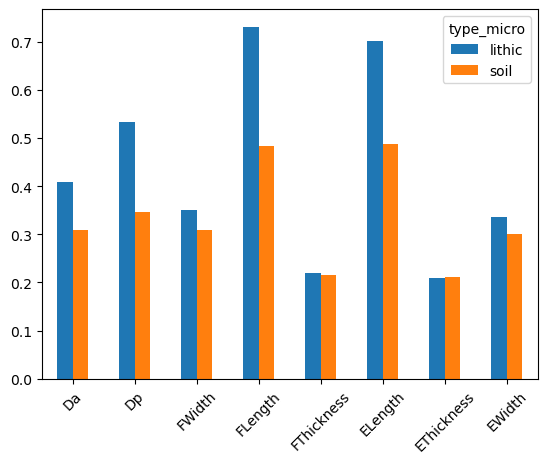

In [14]:
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 10 (Volume)

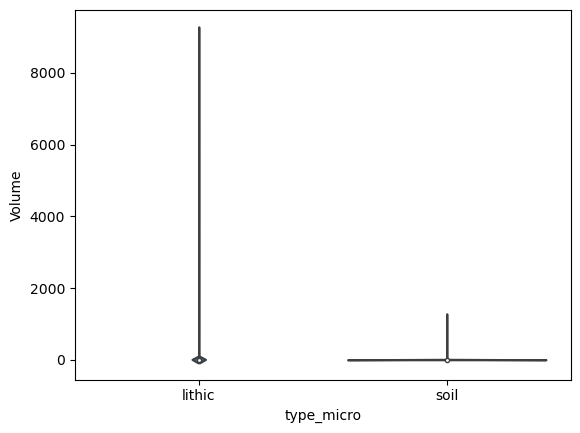

In [15]:
sns.violinplot(x='type_micro', y='Volume', data=micro)

##### columns 11-27 (Area, Perimeter, CHull Area, CHull Perimeter, Sphericity, L/T Ratio, T/L Aspect Ratio, Campactness, Roundness, Ellipse Ratio, Circularity, Solidity, Concavity, Convexity, Extent, Hash, Transparency)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

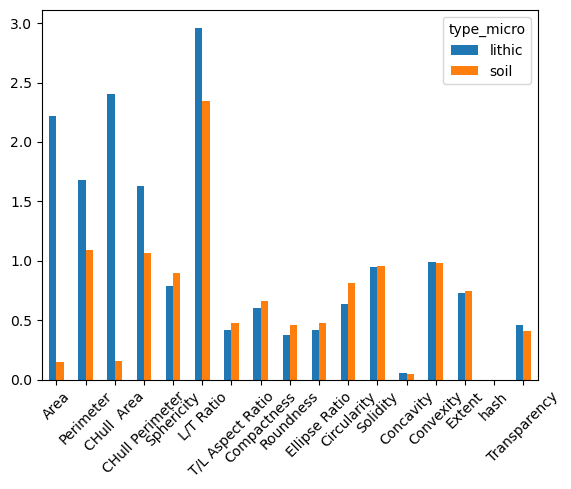

In [16]:
mean_by_group = micro.iloc[:, list(range(11,28)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 28 (Surface Area) - 1

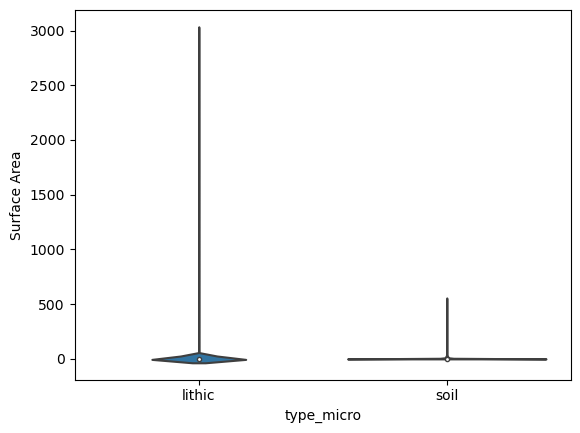

In [17]:
sns.violinplot(x='type_micro', y='Surface Area', data=micro)

##### columns 28 ((Surface Area)) - 2

(array([0]), <a list of 1 Text major ticklabel objects>)

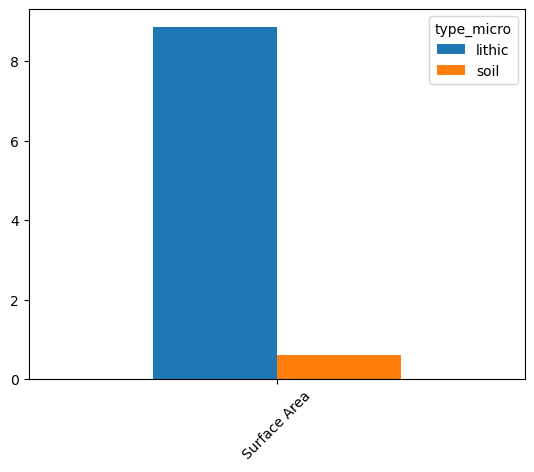

In [18]:
mean_by_group = micro.iloc[:, list(range(29,30)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 37-40 (L/W Ratio, W/L Ratio, W/T Ratio, T/W Ratio)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

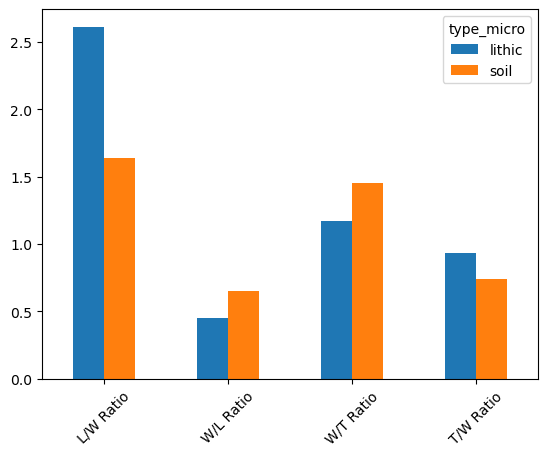

In [19]:
mean_by_group = micro.iloc[:, list(range(37,41)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 41 (CHull Surface Area)

(array([0]), <a list of 1 Text major ticklabel objects>)

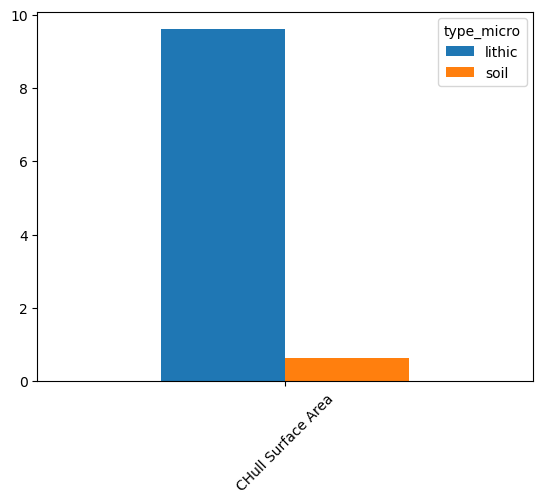

In [20]:
mean_by_group = micro.iloc[:, list(range(41,42)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 42 (Sieve)

(array([0]), <a list of 1 Text major ticklabel objects>)

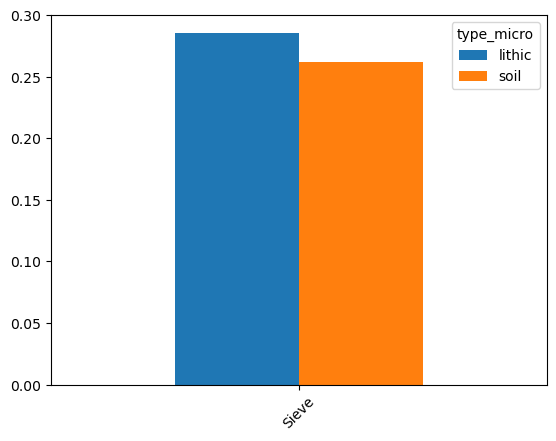

In [22]:
mean_by_group = micro.iloc[:, list(range(42,43)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 43 (Angularity)

(array([0]), <a list of 1 Text major ticklabel objects>)

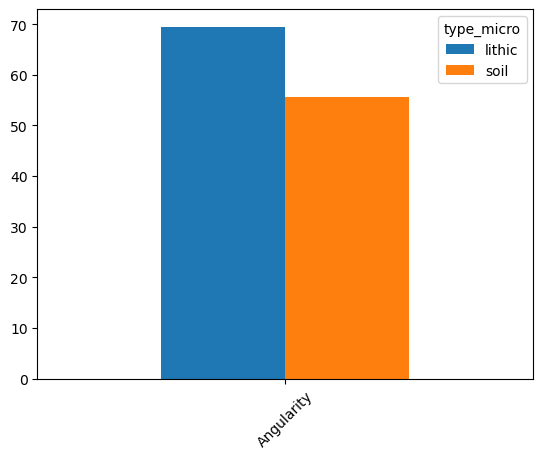

In [23]:
mean_by_group = micro.iloc[:, list(range(43,44)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 44 (Ellipticity)

(array([0]), <a list of 1 Text major ticklabel objects>)

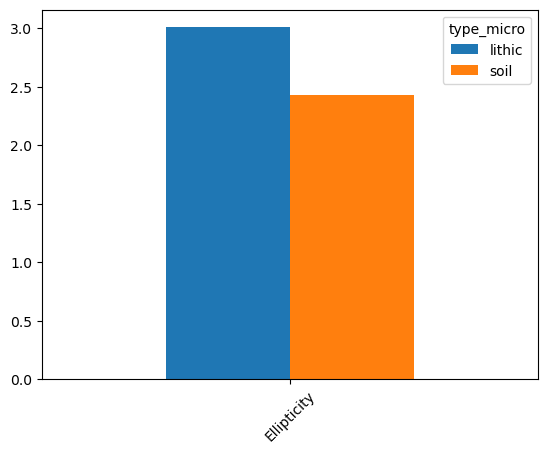

In [24]:
mean_by_group = micro.iloc[:, list(range(44,45)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

##### columns 45-47 (Fiber Length, Fiber Width, Krumbein Rnd)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

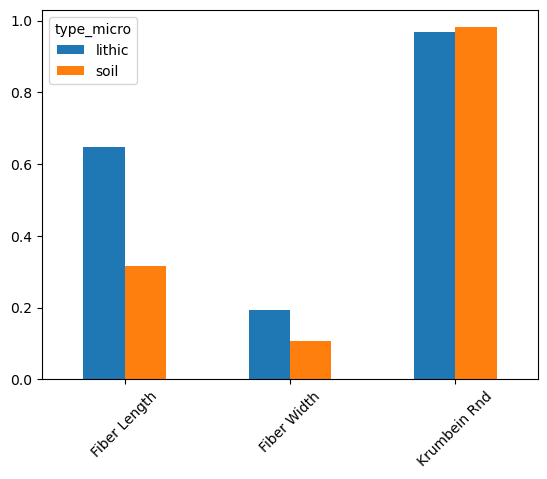

In [25]:
mean_by_group = micro.iloc[:, list(range(45,48)) + [-1]].groupby('type_micro').mean()
mean_by_group.T.plot(kind='bar', stacked=False)
plt.xticks(rotation=45)

In [26]:
micro.head(1)

,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,Filter0,Filter1,Filter2,Filter3,Filter4,Filter5,Filter6,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,104,10708,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.17,802.914,108.399,0.808,4.6,0.217,0.66,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0,0.081,0.0,2998.247,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.27,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic


#### Distributions

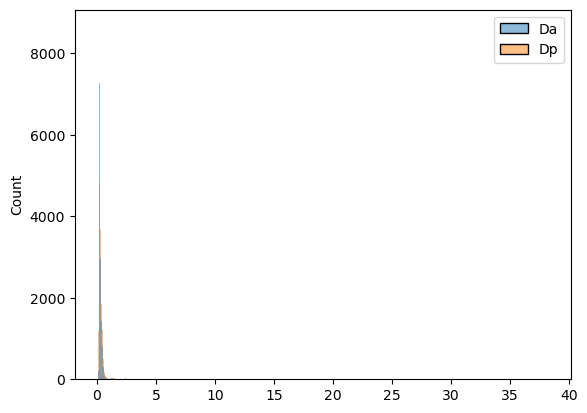

In [27]:
sns.histplot(data=micro[['Da','Dp']])

### Confusion Matrix

In [28]:
corr_micro = micro[["Da", "Sphericity", "Circularity", "Convexity", "FLength", "FWidth", "FThickness", "Transparency", "W/L Ratio", "L/W Ratio"]]

In [29]:
corr_matrix = corr_micro.corr()

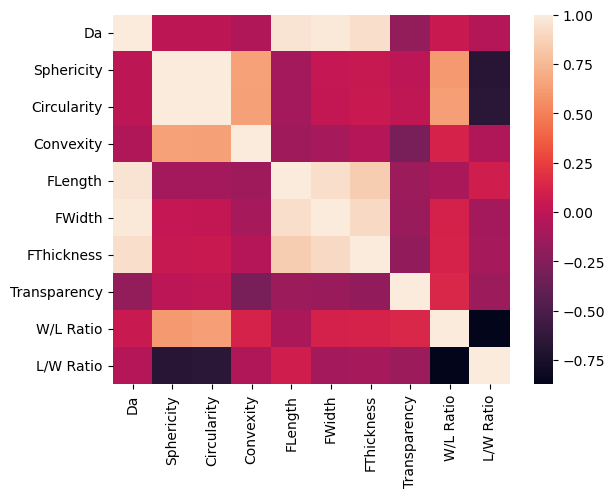

In [30]:
sns.heatmap(corr_matrix)

In [31]:
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,Da,Sphericity,Circularity,Convexity,FLength,FWidth,FThickness,Transparency,W/L Ratio,L/W Ratio
Da,1.00,0.00,0.00,-0.06,0.96,0.98,0.94,-0.18,0.05,-0.04
Sphericity,0.00,1.00,0.99,0.64,-0.11,0.03,0.05,-0.01,0.61,-0.67
Circularity,0.00,0.99,1.00,0.64,-0.11,0.02,0.05,0.01,0.63,-0.66
Convexity,-0.06,0.64,0.64,1.00,-0.13,-0.10,-0.04,-0.30,0.12,-0.05
FLength,0.96,-0.11,-0.11,-0.13,1.00,0.94,0.85,-0.14,-0.09,0.09
FWidth,0.98,0.03,0.02,-0.10,0.94,1.00,0.91,-0.15,0.11,-0.11
FThickness,0.94,0.05,0.05,-0.04,0.85,0.91,1.00,-0.19,0.12,-0.10
Transparency,-0.18,-0.01,0.01,-0.30,-0.14,-0.15,-0.19,1.00,0.14,-0.15
W/L Ratio,0.05,0.61,0.63,0.12,-0.09,0.11,0.12,0.14,1.00,-0.87
L/W Ratio,-0.04,-0.67,-0.66,-0.05,0.09,-0.11,-0.10,-0.15,-0.87,1.00


In [32]:
corr_matrix = micro.select_dtypes(include='number').corr()

In [33]:
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

/Users/ricky/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/ricky/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd
Id,1.00,-0.02,-0.16,-0.16,-0.13,-0.12,-0.18,-0.12,-0.18,-0.14,-0.02,-0.05,-0.16,-0.05,-0.16,0.03,0.10,-0.11,-0.15,-0.15,-0.11,0.03,-0.10,0.10,-0.12,-0.12,nan,0.18,0.07,-0.05,-0.05,0.01,0.15,-0.18,-0.05,-0.15,0.06,0.10,-0.03,-0.07,0.12
Img Id,-0.02,1.00,0.08,0.08,0.04,0.06,0.08,0.05,0.08,0.04,0.01,0.04,0.08,0.04,0.09,-0.24,-0.02,0.06,0.06,0.06,0.09,-0.25,0.08,-0.08,0.15,0.06,nan,-0.52,-0.20,0.04,0.30,-0.25,-0.26,0.38,0.04,0.06,-0.28,-0.03,0.03,0.06,0.12
Da,-0.16,0.08,1.00,0.99,0.98,0.96,0.94,0.95,0.94,0.98,0.49,0.69,0.99,0.68,0.99,0.00,0.06,-0.06,0.01,0.01,-0.06,0.00,-0.01,0.01,-0.06,0.15,nan,-0.18,-0.04,0.69,-0.04,0.05,0.12,-0.13,0.68,0.99,-0.24,0.05,0.65,0.66,-0.63
Dp,-0.16,0.08,0.99,1.00,0.96,0.98,0.91,0.97,0.90,0.96,0.52,0.72,1.00,0.72,1.00,-0.08,0.10,-0.09,-0.04,-0.04,-0.09,-0.08,-0.08,0.08,-0.11,0.12,nan,-0.17,-0.02,0.72,0.02,0.00,0.12,-0.12,0.72,0.96,-0.22,0.10,0.72,0.67,-0.60
FWidth,-0.13,0.04,0.98,0.96,1.00,0.94,0.91,0.93,0.91,1.00,0.50,0.69,0.96,0.68,0.96,0.03,0.09,-0.09,-0.02,-0.02,-0.09,0.02,-0.04,0.04,-0.10,0.14,nan,-0.15,-0.02,0.69,-0.11,0.11,0.23,-0.23,0.68,0.99,-0.23,0.08,0.66,0.66,-0.61
FLength,-0.12,0.06,0.96,0.98,0.94,1.00,0.85,1.00,0.85,0.93,0.51,0.71,0.98,0.71,0.98,-0.11,0.24,-0.21,-0.18,-0.17,-0.21,-0.11,-0.13,0.13,-0.13,0.04,nan,-0.14,-0.02,0.71,0.09,-0.09,0.21,-0.20,0.71,0.93,-0.21,0.24,0.77,0.69,-0.57
FThickness,-0.18,0.08,0.94,0.91,0.91,0.85,1.00,0.84,1.00,0.91,0.34,0.52,0.91,0.51,0.91,0.05,-0.09,0.08,0.10,0.10,0.07,0.05,0.02,-0.02,-0.04,0.05,nan,-0.19,-0.03,0.52,-0.10,0.12,-0.02,-0.01,0.51,0.97,-0.25,-0.09,0.52,0.58,-0.71
ELength,-0.12,0.05,0.95,0.97,0.93,1.00,0.84,1.00,0.83,0.92,0.50,0.70,0.97,0.69,0.97,-0.13,0.27,-0.24,-0.21,-0.20,-0.24,-0.13,-0.16,0.16,-0.16,0.03,nan,-0.14,-0.01,0.70,0.11,-0.11,0.22,-0.22,0.69,0.91,-0.20,0.27,0.78,0.68,-0.57
EThickness,-0.18,0.08,0.94,0.90,0.91,0.85,1.00,0.83,1.00,0.91,0.33,0.51,0.90,0.50,0.90,0.07,-0.09,0.08,0.11,0.10,0.08,0.07,0.03,-0.03,-0.03,0.06,nan,-0.19,-0.04,0.51,-0.11,0.12,-0.02,-0.01,0.50,0.96,-0.26,-0.09,0.50,0.57,-0.70
EWidth,-0.14,0.04,0.98,0.96,1.00,0.93,0.91,0.92,0.91,1.00,0.50,0.68,0.96,0.68,0.96,0.04,0.07,-0.08,0.00,-0.00,-0.07,0.04,-0.02,0.02,-0.09,0.16,nan,-0.16,-0.02,0.68,-0.12,0.13,0.22,-0.22,0.68,0.99,-0.24,0.06,0.64,0.65,-0.61
